## Списки

Вам дан список. Создайте новый список, в котором порядок следования элементов будет обратным относительно исходного списка.

In [ ]:
l = [1, 2, 3, 4]
l_new = l[::-1]

Вам дан список. Создайте новый список, в котором будут присутствовать только чётные элементы исходного списка.

In [ ]:
l = [1, 2, 3, 4]
l_new = [x for x in l if x%2 == 0]

## Генераторы

Вам дан список. Создайте новый список, который удвоит каждый элемент исходного списка.

In [ ]:
l = [1, 2, 3, 4]
l_new = [x * 2 for x in l]

Вам дан список. Создайте новый список, который умножит увеличит на треть элемент исходного списка.

In [ ]:
l = [1, 2, 3, 4]
l_new = [x * (4/3) for x in l]

## Встроенные функции

Вам дана строка. Выведите ascii-код максимального элемента в строке.

In [ ]:
s ='abcdefa'
l = list(s)
ord(max(l))

102

Вам дана строка. Преобразуйте её в кортежи, состоящие из пары – порядковый номер элемента строки, ascii-код элемента.

In [ ]:
s = 'abcdef'
l = list(s)
l_new = [(i, ord(l[i])) for i in range(len(l))]

## NumPy

Создайте многомерный массив, посчитайте суммы элементов по различным осям.

In [ ]:
import numpy as np


arr = np.random.randint(0, 10, (3, 3))
s0 = np.sum(arr, axis=0)
s1 = np.sum(arr, axis=1)

Дан массив A (numpy.array()), заполненный 1.
Дан массив I (numpy.array()) индексов.

Прибавьте к каждому значению массиву A по массиву индексов +1.

In [ ]:
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,len(A),k)


A[I] += 1
A

array([2., 1., 1., 2., 2., 1., 2., 2., 2., 1.])

## Pandas

https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте гистаграмму переменной `Target`.
- Постройте heatmap для матрицы корреляции переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных классов *(т.е. отдельно какие показатели у класса 0, какие у класса 1)*.
- Проанализируйте колонку `SpType`. Подсчитаете количество звёзд относящихся к различным классам.
`SpType` - спектральный класс звезды согласно классификации Моргана-Кинана.

> Какие типы данных присутствуют в датасете?


> Есть ли в датасете пропущенные значения? Если да, то сколько и где?

Типы данных, присутствующие в датасете

Пропуски отсутствуют

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Star3642_balanced.csv')

data_types = df.dtypes.unique()
print(data_types)

if sum(df.isnull().sum()) != 0:
  print(df.isnull().sum())

[dtype('float64') dtype('O') dtype('int64')]




> Постройте гистаграмму переменной Target.



Гистограмма переменной Target

<Axes: >

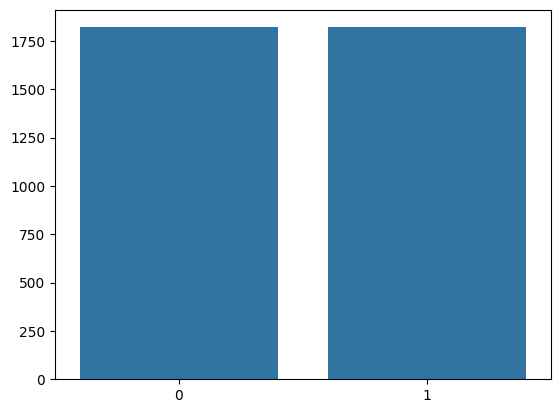

In [2]:
x = ['0', '1']
y = [len(df[df["TargetClass"] == 0]), len(df[df["TargetClass"] == 1])]
sns.barplot(x=x, y=y)



> Постройте heatmap для матрицы корреляции переменных в датасете.



heatmap матрицы корреляции

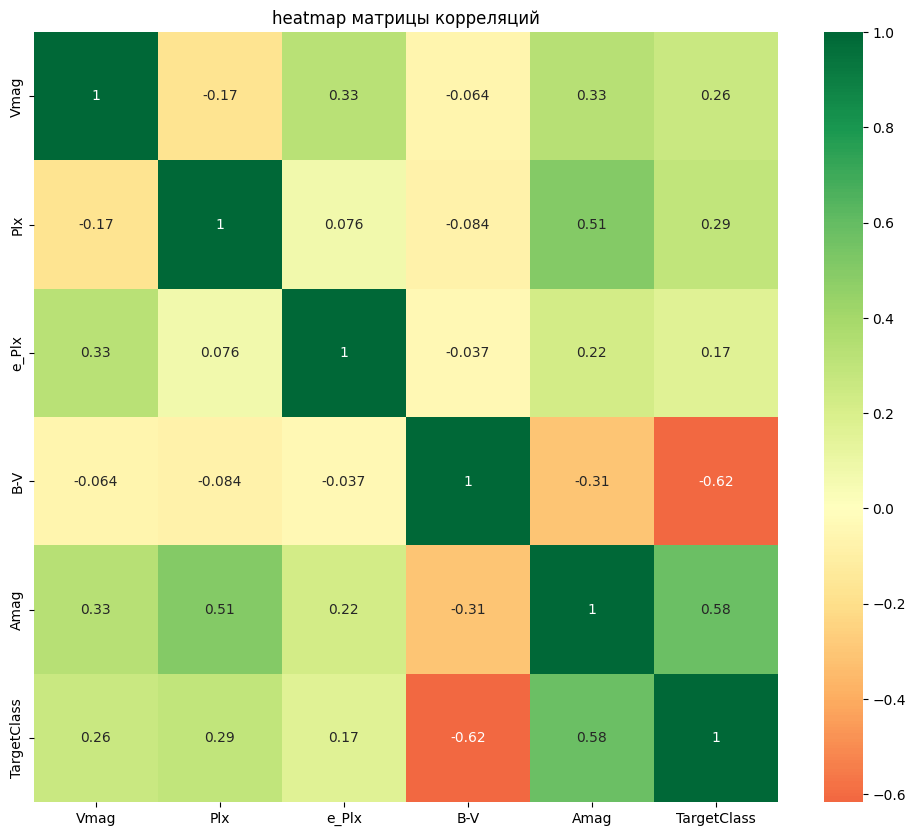

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)
plt.title('heatmap матрицы корреляций')

plt.show()



> Постройте pairplot для всех переменных



pairplot-ы

<Figure size 1000x800 with 0 Axes>

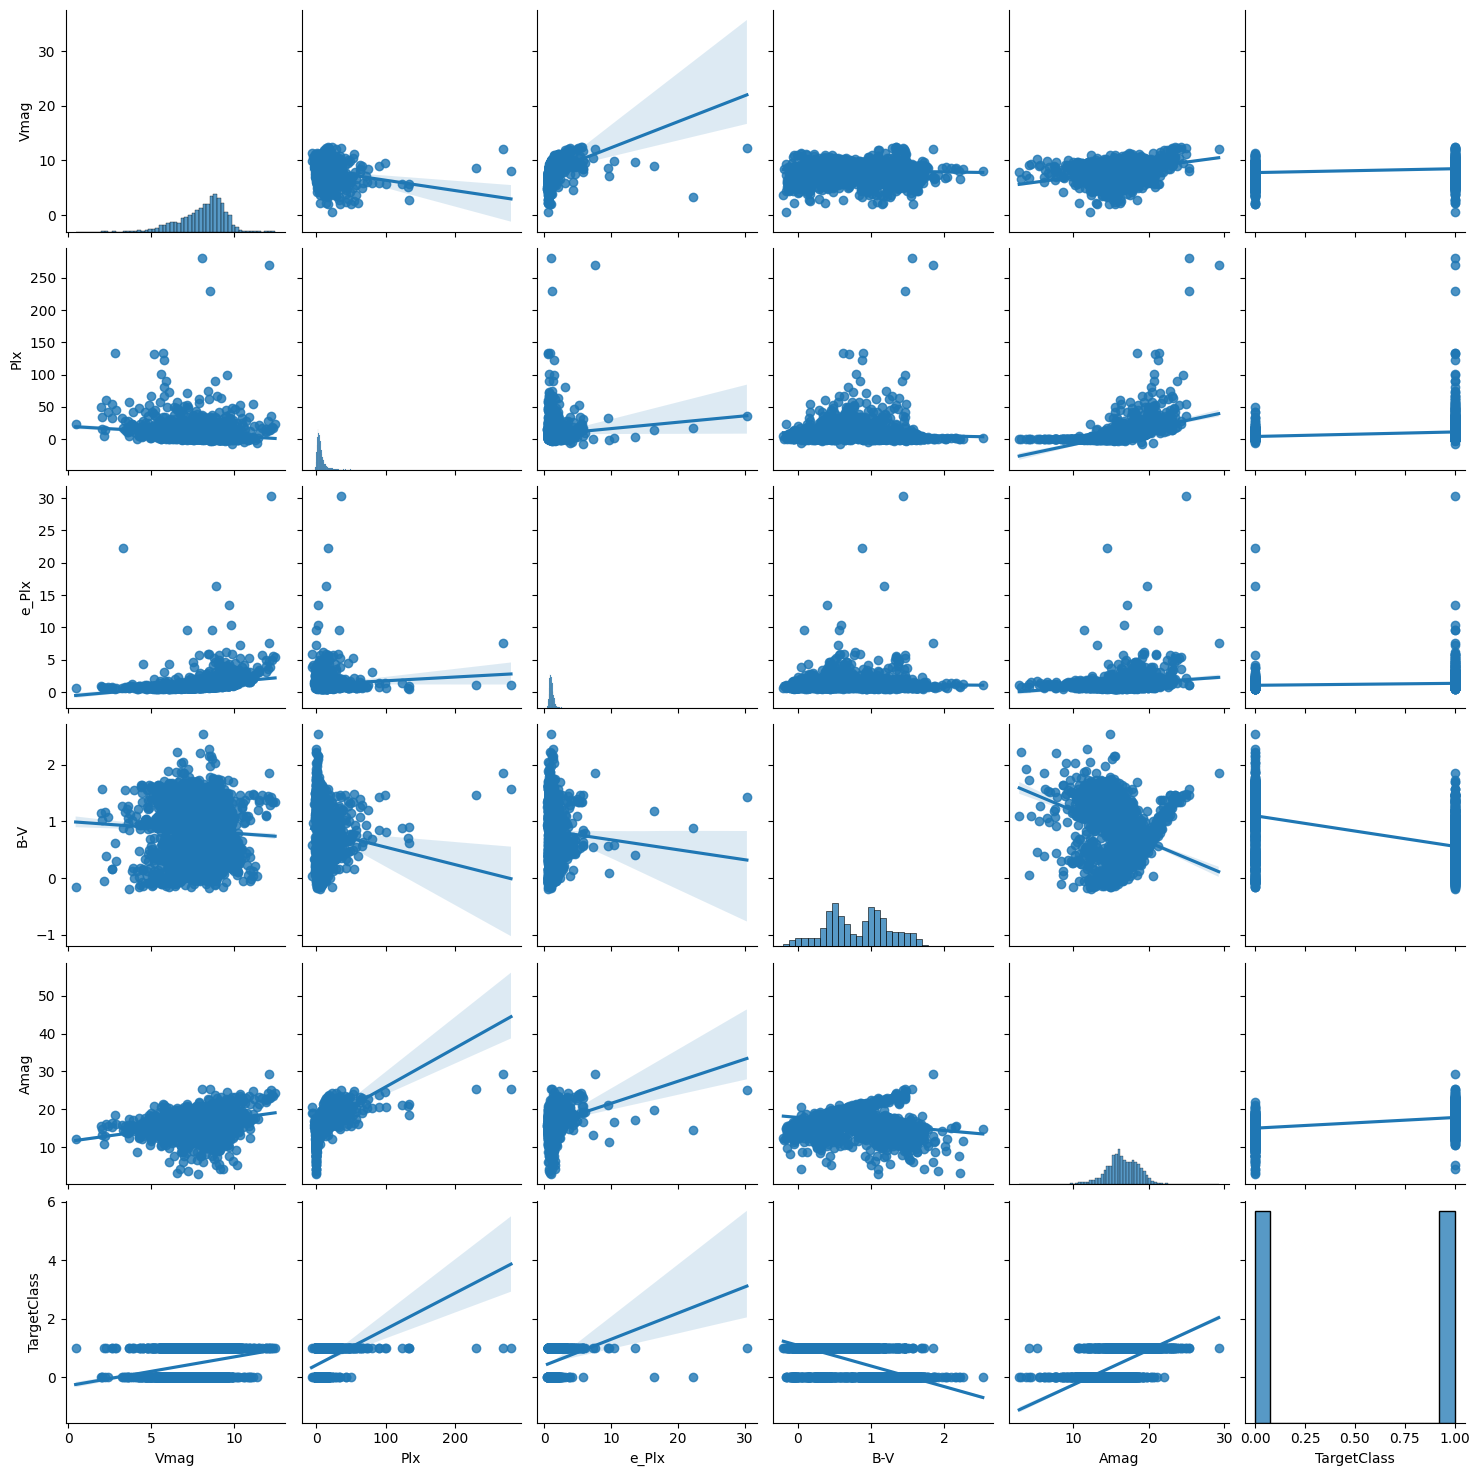

In [4]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="reg")
plt.show()



> Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).



Коробки с усами

<Axes: ylabel='TargetClass'>

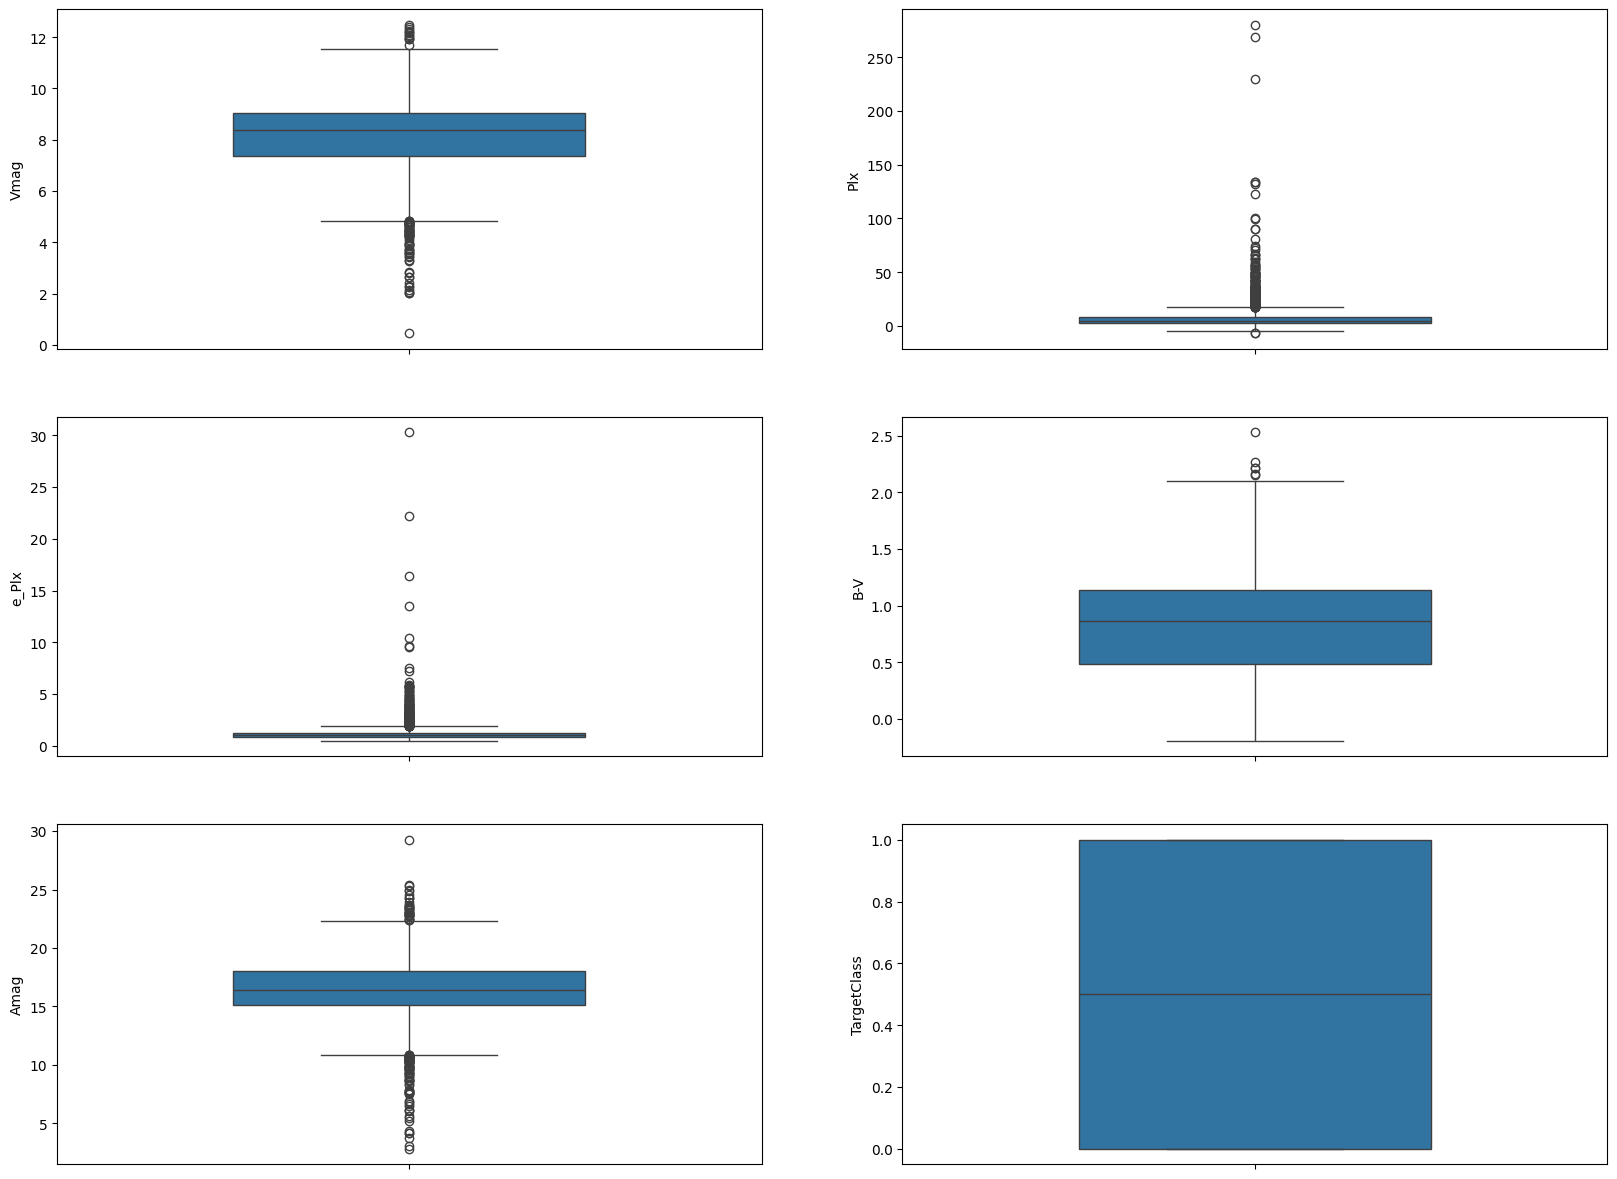

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))

#Vmag   Plx e_Plx   B-V Amag  TargetClass
sns.boxplot(df['Vmag'], ax=axes[0, 0], width=0.5)
sns.boxplot(df['Plx'], ax=axes[0, 1], width=0.5)
sns.boxplot(df['e_Plx'], ax=axes[1, 0], width=0.5)
sns.boxplot(df['B-V'], ax=axes[1, 1], width=0.5)
sns.boxplot(df['Amag'], ax=axes[2, 0], width=0.5)
sns.boxplot(df['TargetClass'], ax=axes[2, 1], width=0.5)

Выбросы

In [26]:
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
#Vmag   Plx e_Plx   B-V Amag  TargetClass

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

df1 = df.drop('SpType', axis=1)

outliers_vmag = df.loc[(df['Vmag'] < boxplot_range[0]['Vmag']) | (df['Vmag'] > boxplot_range[1]['Vmag'])]
outliers_plx = df.loc[(df['Plx'] < boxplot_range[0]['Plx']) | (df['Plx'] > boxplot_range[1]['Plx'])]
outliers_e_plx = df.loc[(df['e_Plx'] < boxplot_range[0]['e_Plx']) | (df['e_Plx'] > boxplot_range[1]['e_Plx'])]
outliers_b_v = df.loc[(df['B-V'] < boxplot_range[0]['B-V']) | (df['B-V'] > boxplot_range[1]['B-V'])]
outliers_amag = df.loc[(df['Amag'] < boxplot_range[0]['Amag']) | (df['Amag'] > boxplot_range[1]['Amag'])]

print(f'Выбросы по колонке Vmag:\n')
display(outliers_vmag)
print('------------------------\n')
print(f'Выбросы по колонке Plx:\n')
display(outliers_plx)
print('------------------------\n')
print(f'Выбросы по колонке e-Plx:\n')
display(outliers_e_plx)
print('------------------------\n')
print(f'Выбросы по колонке B-V:\n')
display(outliers_b_v)
print('------------------------\n')
print(f'Выбросы по колонке Amag:\n')
display(outliers_amag)


Выбросы по колонке Vmag:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
21,4.83,35.33,0.82,0.421,[F5IV],17.570717,1
128,4.34,23.73,0.68,0.170,[A7Vvar],16.216488,1
172,3.99,10.84,0.79,1.554,"[K5, M0III]",14.165147,0
208,0.45,22.68,0.57,-0.158,[B3Vp],12.228215,1
210,2.40,42.14,0.78,1.083,[K0III...],15.523474,0
...,...,...,...,...,...,...,...
3326,3.59,18.76,0.74,1.275,[K3III],14.956165,0
3443,4.17,0.79,0.52,0.130,[B1Ia],8.658135,0
3483,12.31,18.80,4.99,1.336,[M0V:],23.680790,1
3632,3.86,23.93,1.22,0.130,[A5V],15.754713,1


------------------------

Выбросы по колонке Plx:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
21,4.83,35.33,0.82,0.421,[F5IV],17.570717,1
23,5.96,22.42,0.67,0.419,[F5V],17.713177,1
43,5.54,29.58,1.42,0.347,[F0V],17.894993,1
57,5.63,100.24,0.68,0.804,[K0V],20.635204,1
74,9.35,26.92,1.21,0.951,[K1V],21.500376,1
...,...,...,...,...,...,...,...
3582,7.85,19.99,0.94,0.539,"[F7, F8V]",19.354063,1
3604,8.71,19.40,1.25,0.657,[G3V],20.149010,1
3610,6.44,31.01,0.87,0.594,[G3V],18.897509,1
3632,3.86,23.93,1.22,0.130,[A5V],15.754713,1


------------------------

Выбросы по колонке e-Plx:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
15,9.79,3.91,2.45,0.711,"[F8IV, V]",17.750885,1
53,7.81,4.32,1.96,1.082,[G8V],15.987419,1
81,9.36,8.38,2.39,0.547,[F7V],18.976220,1
93,8.89,5.75,2.28,0.991,[G8III],17.688340,0
158,9.15,6.80,1.92,0.987,"[G8, K0III]",18.312544,0
...,...,...,...,...,...,...,...
3602,10.95,1.57,3.06,0.370,[A0V],16.929499,1
3609,10.66,2.03,2.70,0.980,[K0III],17.197480,0
3624,9.12,11.70,3.14,0.676,[G3V],19.460930,1
3634,12.49,22.93,5.47,1.340,[M0V:],24.292019,1


------------------------

Выбросы по колонке B-V:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
396,8.47,2.37,1.20,2.155,[M2Iab],15.343742,0
641,8.48,-0.45,1.27,2.266,[M2III],11.746062,0
1164,8.61,2.46,1.32,2.157,[M2Ia0-a...],15.564675,0
1254,7.97,0.09,0.96,2.210,[M2III],7.741212,0
1333,6.54,0.02,0.80,2.215,[K5Ia0-a...],3.045150,0
2975,8.12,2.15,1.05,2.530,[C5II],14.782192,0


------------------------

Выбросы по колонке Amag:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
33,8.97,0.13,0.88,1.724,[M1III:],9.539717,0
34,9.01,-0.21,0.93,1.518,"[M2, M3III]",10.621097,0
47,10.11,-0.07,1.52,0.320,[B5II],9.335489,0
66,8.81,-0.12,1.10,1.216,"[K1, K2II]",9.205907,0
157,5.90,0.89,0.58,0.274,[A1III],10.646950,0
...,...,...,...,...,...,...,...
3483,12.31,18.80,4.99,1.336,[M0V:],23.680790,1
3587,8.81,0.20,1.44,1.148,"[K1, K2III]",10.315150,0
3593,9.38,0.15,1.86,0.580,[G8III:],10.260457,0
3605,7.28,0.44,0.75,0.637,[A1Ia],10.497263,0




> Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных классов (т.е. отдельно какие показатели у класса 0, какие у класса 1).



Для класса 0

In [25]:
df0 = df[df['TargetClass'] == 0].drop(['TargetClass'], axis=1)
max_values = df0.max(axis=0, numeric_only=True)
min_values = df0.min(axis=0, numeric_only=True)
mean_values = df0.mean(axis=0, numeric_only=True)
med_values = df0.median(axis=0, numeric_only=True)
df1 = df[df['TargetClass'] == 1].drop(['TargetClass'], axis=1)
max_values1 = df1.max(axis=0, numeric_only=True)
min_values1 = df1.min(axis=0, numeric_only=True)
mean_values1 = df1.mean(axis=0, numeric_only=True)
med_values1 = df1.median(axis=0, numeric_only=True)
print('Максимальные значения\n')
display(pd.concat([max_values, max_values1], axis=1))
print()
print('Минимальные значения:\n')
display(pd.concat([min_values, min_values1], axis=1))
print()
print(f'Средние значения:\n')
display(pd.concat([mean_values, mean_values1], axis=1))
print()
print(f'Медианные значения:\n')
display(pd.concat([med_values, med_values1], axis=1))

Максимальные значения



,0,1
Vmag,11.420000,12.490000
Plx,49.480000,280.270000
e_Plx,22.220000,30.290000
B-V,2.530000,1.850000
Amag,21.997383,29.249165



Минимальные значения:



,0,1
Vmag,2.010,0.450
Plx,-6.630,-6.820
e_Plx,0.470,0.490
B-V,-0.154,-0.196
Amag,2.820,4.140



Средние значения:



,0,1
Vmag,7.766546,8.474514
Plx,4.098380,11.113926
e_Plx,1.024778,1.328358
B-V,1.096238,0.557915
Amag,15.020683,17.834092



Медианные значения:



,0,1
Vmag,7.990000,8.750000
Plx,3.250000,7.590000
e_Plx,0.940000,1.150000
B-V,1.109000,0.526000
Amag,15.396389,17.947254


Для класса 1

In [8]:
df1 = df[df['TargetClass'] == 1].drop(['TargetClass'], axis=1)
max_values = df1.max(axis=0, numeric_only=True)
min_values = df1.min(axis=0, numeric_only=True)
mean_values = df1.mean(axis=0, numeric_only=True)
med_values = df1.median(axis=0, numeric_only=True)
print(f'Максимальные значения:\n{max_values}\n\n------------\n')
print(f'Минимальные значения:\n{min_values}\n\n------------\n')
print(f'Средние значения:\n{mean_values}\n\n------------\n')
print(f'Медианные значения:\n{med_values}\n\n------------\n')

Максимальные значения:
Vmag      12.490000
Plx      280.270000
e_Plx     30.290000
B-V        1.850000
Amag      29.249165
dtype: float64

------------

Минимальные значения:
Vmag     0.450
Plx     -6.820
e_Plx    0.490
B-V     -0.196
Amag     4.140
dtype: float64

------------

Средние значения:
Vmag      8.474514
Plx      11.113926
e_Plx     1.328358
B-V       0.557915
Amag     17.834092
dtype: float64

------------

Медианные значения:
Vmag      8.750000
Plx       7.590000
e_Plx     1.150000
B-V       0.526000
Amag     17.947254
dtype: float64

------------



> Проанализируйте колонку SpType. Подсчитаете количество звёзд относящихся к различным классам. SpType - спектральный класс звезды согласно классификации Моргана-Кинана.



Число значений

In [9]:
df['SpType'] = df['SpType'].str.split('/')
df.explode('SpType')['SpType'].value_counts()

,count
SpType,
K0III,338
K1III,221
K2III,198
G8III,169
F5V,157
...,...
F5III+...,1
K7Iab:,1
O9IIInn,1
